# Генерация данных для РГР по статистической обработке данных

In [1]:
from scipy import mean, std
from scipy.stats import norm, chisquare, chi2, t, f, pearsonr
from matplotlib.pyplot import *
import seaborn as sb
from math import *
from random import gauss, random, randint, choice
import sys

import pandas as pd
from IPython.display import display, HTML

# показывать графики в яйчейке вывода, а не в отдельном окне
%matplotlib inline  



In [2]:
# Данные для примера

X = [4.4, 4.1, 5.1, 4.8, 4.9, 5.1, 4.7, 4.1, 6.7, 3.3, 5.3, 5.7, 3.0, 2.3, 4.7, 6.1, 3.9, 3.3, 5.1, 4.4, 4.3, 5.9, 5.2, 4.0, 4.9, 4.8, 3.6, 4.6, 4.5, 5.3, 2.3, 2.5, 3.8, 5.0, 4.0, 5.5, 3.2, 4.3, 2.5, 3.5, 3.5, 3.9, 4.1, 4.3, 4.3, 5.0, 3.8, 6.1, 4.6, 4.6, 4.3, 5.9, 5.2, 7.2, 4.3, 3.4, 5.1, 4.4, 6.3, 3.9, 4.5, 3.6, 2.8, 5.5, 5.3, 4.8, 3.7, 4.2, 4.8, 5.5, 3.9, 5.2, 4.6, 4.0, 4.3, 3.9, 4.6, 4.6, 6.2, 3.3, 3.9, 4.1, 3.9, 4.7, 6.5, 4.9, 4.9, 7.2, 5.8, 4.7, 4.9, 5.7, 4.9, 4.0, 3.7, 3.8, 4.2, 4.3, 5.0, 3.4]
Y = [10.1, 10.7, 7.1, 7.8, 10.7, 9.5, 11.9, 13.9, 9.1, 8.0, 9.6, 9.7, 5.5, 3.9, 13.1, 6.9, 10.1, 3.9, 8.3, 4.9, 11.4, 10.9, 10.1, 6.7, 10.8, 7.7, 5.7, 9.1, 9.3, 7.0, 7.1, 13.0, 13.5, 11.1, 10.4, 10.6, 11.2, 9.0, 2.8, 10.4, 11.4, 12.8, 9.8, 11.7, 11.3, 11.5, 10.7, 7.9, 14.2, 12.4, 8.4, 10.7, 11.9, 9.1, 11.6, 13.3, 3.3, 10.6, 5.6, 8.0, 13.9, 6.2, 10.7, 8.0, 14.1, 12.2, 10.1, 8.5, 10.9, 11.9, 4.5, 9.8, 6.1, 12.1, 14.4, 7.4, 8.4, 12.1, 5.5, 9.4, 10.0, 13.1, 10.4, 12.6, 11.0, 10.9, 7.6, 11.4, 9.5, 10.3, 7.1, 8.3, 9.3, 9.9, 16.8, 7.3, 9.5, 12.3, 6.3, 12.0]
# X = [gauss(0,1) for i in range(0,1000)]
XY = pd.DataFrame({'X': X, 'Y': Y})
alpha = 0.01
N = len(X)
Ny = len(Y)

In [2]:
# функции определяющие и выводящие на экран числовые характеристики

def describe(X, alpha):
    m = mean(X)
    sd = std(X, ddof=1)
    delta = t.isf(alpha, len(X)-2)* sd / sqrt(len(X))
    _x_ = m - delta, m + delta
    return m, sd, _x_


def describe2(X,Y, alpha=0.01, show=False):
    n,m = len(X), len(Y)
    mx, sdx, _x_ = describe(X, alpha)
    my, sdy, _y_ = describe(Y, alpha)
    fn = max(sdx, sdy)/min(sdx, sdy)
    fk = f.isf(alpha/2, n-1, m-1)
    tk = t.isf(alpha/2, len(X)+len(Y)-2)
    tn = (mx - my) / sqrt( (sdx**2 * (n-1) + sdy**2 * (m-1)) ) * sqrt( (n*m* (n+m-2))/(n+m) )
    r,p = pearsonr(X,Y)
    if show:
        print("           X       Y")
        print("Средние: {0:3.2f}    {1:3.2f}".format(mx,my))
        print("ст.откл: {0:3.2f}    {1:3.2f}".format(sdx,sdy))
        print("{2:.0f}-процентный доверительный интервал X: ( {0:3.2f}, {1:3.2f} )".format(_x_[0], _x_[1], 100-alpha*100))
        print("{2:.0f}-процентный доверительный интервал Y: ( {0:3.2f}, {1:3.2f} )".format(_y_[0], _y_[1], 100-alpha*100))
        print("Гипотеза о равенстве дисперсий: "+("принимается" if -fk <= fn <= fk else "отклоняется") + 
              " ( fn = {0:3.2f}; fk = ±{1:3.2f} )".format(fn, fk))
        print("Гипотеза о равенстве средних: " + ("принимается" if -tk <= tn <= tk else "отклоняется") + 
              " ( tn = {0:3.2f}; tk = ±{1:3.2f} )".format(tn, tk))
        print("Коэффициент корреляции Пирсона r = {0:.2f} ".format(r) + ("значим" if (p<alpha) else "не значим") 
              + " (p-value = {0:.6}).".format(p))
    return tk,tn,-tk <= tn <= tk, r,p
    
# вычислим числовые характеристики
Mx = mean(X)
sd = std(X, ddof=1)
mu3 = mean(list(map(lambda x: ((x-Mx)/sd)**3, X)))
Sk = mu3/sd**3  # коэффициент ассиметрии
mu4 = mean( list(map(lambda x: (x-Mx)**4, X)))
Ku = mu4/sd**4 - 3
print("Объём выборки: %i"% len(X))
print("Числовые характеристики:")
print("Mean: %2.3f"%Mx)
print("std : %2.3f"%sd)
print("mu3: %2.3f"%mu3)
print("mu4: %2.3f"%mu4)
print("Skewness: %2.3f"%Sk)
print("Kurtosis: %2.3f"%Ku)
print("Max: %2.3f" % max(X))
print("Min: %2.3f" % min(X))


describe2(X,Y, alpha, True)

NameError: name 'X' is not defined

h: 0.30


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
intervals,2.1497,2.4503,2.7510,3.0516,3.3523,3.6529,3.9535,4.2542,4.5548,4.8555,5.1561,5.4568,5.7574,6.0580,6.3587,6.6593,6.9600,7.2606
Z-intervals,-2.4203,-2.1142,-1.8081,-1.5020,-1.1960,-0.8899,-0.5838,-0.2777,0.0283,0.3344,0.6405,0.9466,1.2526,1.5587,1.8648,2.1709,2.4769,2.7830
Pi,NaN,0.0095,0.0180,0.0312,0.0493,0.0709,0.0929,0.1109,0.1207,0.1197,0.1081,0.0890,0.0668,0.0456,0.0284,0.0161,0.0083,0.0039
freq,NaN,2.0000,2.0000,2.0000,4.0000,6.0000,12.0000,10.0000,13.0000,14.0000,13.0000,6.0000,5.0000,3.0000,4.0000,1.0000,1.0000,2.0000
freq_t,NaN,0.9495,1.8044,3.1249,4.9311,7.0907,9.2910,11.0933,12.0697,11.9663,10.8107,8.8998,6.6763,4.5637,2.8427,1.6135,0.8345,0.3933


рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределениес уровнем значимости alpha = 0.0100
Значение параметра Хи-квадрат: 12.89
значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы 18 - 1 = 17, где 18 - число участков
chi2, p-value: 12.89, 0.6806,


NameError: name 'chisqprob' is not defined

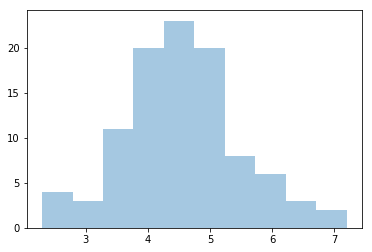

In [4]:
# Зададим уровень значимости alpha - вероятность отклонить верную гипотезу
alpha = 0.01
# построим интервальный ряд
# вычислим шаг для интервала
h = ( max(X) - min(X) ) / (1 + 3.322 * log(len(X)))
# опеределим левую границу первого интервала
_x = min(X) - h/2
print("h: %3.2f"%h)
# определим интервалы
Xint = [_x]
while (Xint[-1] < max(X)): 
    Xint += [Xint[-1]+h]
    
XInt = [(_x,x_) for _x,x_ in zip(Xint[:-1],Xint[1:])]

# Составим таблицу частот
Ni = []
for xi in Xint[1:]:
    Ni +=[0]
    for x in X:
        if xi-h < x <= xi: Ni[-1]+=1
Zint = list(map(lambda x: (x-Mx)/sd, Xint))
Pi = [norm.cdf(z_ if z_ >= min(Zint) else -10) - norm.cdf(_z if _z <= max(Zint) else 10) for _z,z_ in zip(Zint[:-1],Zint[1:])]
Ni_t = list(map(lambda x: x*N, Pi))
# chi2_ = sum( (ni - pi * len(Pi))**2 / (len(Pi)*pi) for ni,pi in zip(Ni,Pi))
# добавим [None] ибо значений ниже границы первого интервала нет, поэтому строка пустая
data = pd.DataFrame({'intervals': Xint, 'Z-intervals': Zint, 'freq': [None]+Ni, 'freq_t': [None]+Ni_t, 'Pi':[None]+Pi })
pd.set_option('precision',4)
display(data[['intervals', 'Z-intervals', 'Pi', 'freq', 'freq_t']].transpose())
s = len(data.freq)
sb.distplot(X, kde = False)
# show()

# Проверим значения критерия хи-квадрат при разном числе интервалов. Существует рекомендация, 
# объединять интервалы так чтобы в них было как минимум по 10 значений
print("рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределение" \
"с уровнем значимости alpha = %2.4f" % alpha)
chi2_ = sum( (fe-ft)**2/ft for fe, ft in zip(data.freq[1:], data.freq_t[1:]))
chi2_c = chi2.isf(q=alpha,df=s-3)  # критическое значение параметра хи-квадрат. (максимальное отклонение для заданного alpha)
print("Значение параметра Хи-квадрат: %2.2f" % chi2_)
pval = chisquare(data.freq[1:], data.freq_t[1:])
print("""значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы %i - 1 = %i, где %i - число участков""" % (s,s-1,s) )
print("chi2, p-value: %2.2f, %2.4f," % pval)
pval = chisqprob(chi2_, len(data.freq[1:])  - 2 - 1)
print("p-value (вычисленное для степеней свободы %i - 1 - 2 = %i): %2.4f" % (s,s-3,pval))
print("Критическое значение chi2 для принятого уровня значимости (определено по таблице для df=%i, alpha=0.01): %2.3f" \
      % (s-3, chi2_c))
r = chi2_ < chi2_c
print("Наблюдаемое значение chi2 = %2.3f " % chi2_ + ("меньше" if r else "больше") + \
      " кртитичекого %2.3f - нулевая гипотеза "%chi2_c+("ПРИНИМАЕТСЯ" if r else "ОТКЛОНЯЕТСЯ"))
# Проверить гипотезу можно ещё и сравнив вычисленное p-value и уровень значимости alpha 
# (из которого как раз и определяется критическое значение chi2)
# Если полуенное p-value < alpha то нулевая гипотеза отклоняется.

sb.jointplot(x='X',y='Y', data=XY)

show()


Генерируется выборка из нормального распределения с mu = 7.3, 11.6; sigma = 4.8
вариант 1     ----------------------------------------
           X       Y
Средние: 7.61    11.99
ст.откл: 4.67    5.33
95-процентный доверительный интервал X: ( 6.83, 8.38 )
95-процентный доверительный интервал Y: ( 11.10, 12.87 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.14; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.18; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.24 значим (p-value = 0.0180175).


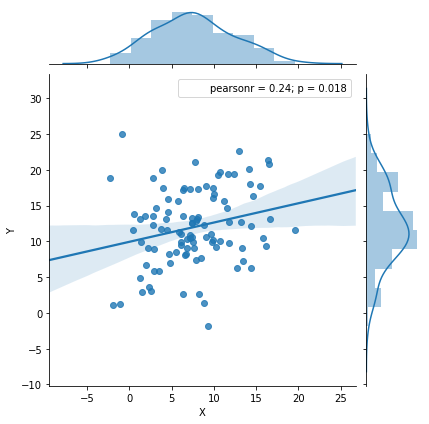

Генерируется выборка из нормального распределения с mu = 14.6, 6.7; sigma = 1.1
вариант 2     ----------------------------------------
           X       Y
Средние: 14.48    6.71
ст.откл: 1.09    1.00
95-процентный доверительный интервал X: ( 14.30, 14.66 )
95-процентный доверительный интервал Y: ( 6.54, 6.88 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 52.40; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.12 не значим (p-value = 0.240793).


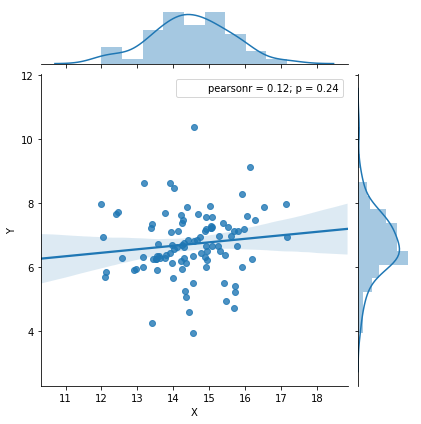

Генерируется выборка из нормального распределения с mu = 6.5, 9.6; sigma = 1.5
вариант 3     ----------------------------------------
           X       Y
Средние: 6.59    9.34
ст.откл: 1.62    1.49
95-процентный доверительный интервал X: ( 6.32, 6.86 )
95-процентный доверительный интервал Y: ( 9.10, 9.59 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -12.50; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.15 не значим (p-value = 0.124349).


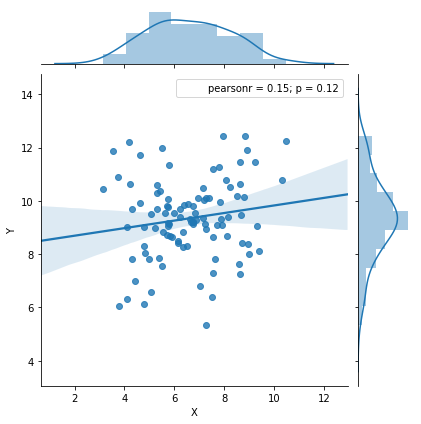

Генерируется выборка из нормального распределения с mu = 10.2, 8.0; sigma = 2.8
вариант 4     ----------------------------------------
           X       Y
Средние: 10.66    8.10
ст.откл: 3.15    2.83
95-процентный доверительный интервал X: ( 10.14, 11.18 )
95-процентный доверительный интервал Y: ( 7.63, 8.57 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.11; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 6.05; tk = ±1.97 )
Коэффициент корреляции Пирсона r = -0.04 не значим (p-value = 0.698611).


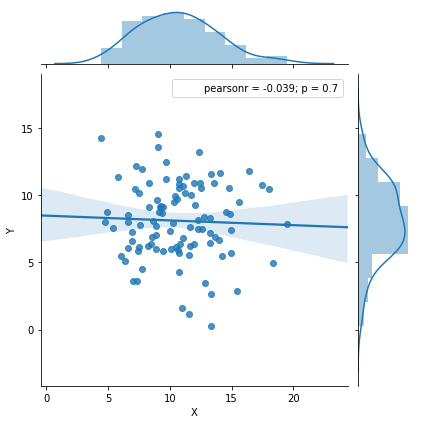

Генерируется выборка из нормального распределения с mu = 7.9, 13.4; sigma = 5.6
вариант 5     ----------------------------------------
           X       Y
Средние: 7.69    12.97
ст.откл: 5.88    5.62
95-процентный доверительный интервал X: ( 6.72, 8.67 )
95-процентный доверительный интервал Y: ( 12.03, 13.90 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.48; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.03 не значим (p-value = 0.783804).


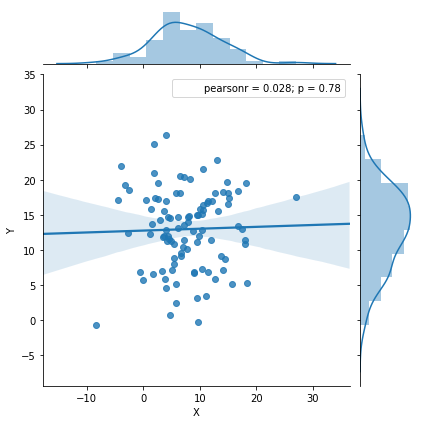

Генерируется выборка из нормального распределения с mu = 7.8, 13.0; sigma = 4.8
вариант 6     ----------------------------------------
           X       Y
Средние: 8.19    12.80
ст.откл: 4.55    5.03
95-процентный доверительный интервал X: ( 7.43, 8.95 )
95-процентный доверительный интервал Y: ( 11.96, 13.63 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.10; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.79; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.21 значим (p-value = 0.0402161).


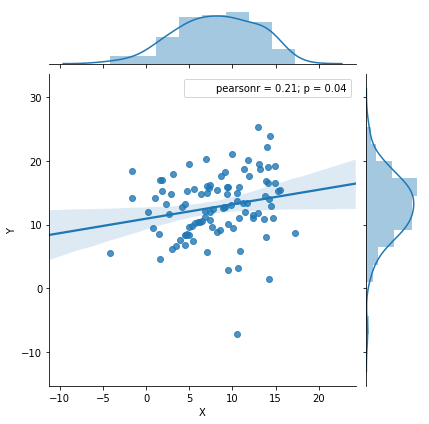

Генерируется выборка из нормального распределения с mu = 11.8, 13.3; sigma = 2.8
вариант 7     ----------------------------------------
           X       Y
Средние: 10.99    13.60
ст.откл: 3.09    2.71
95-процентный доверительный интервал X: ( 10.48, 11.51 )
95-процентный доверительный интервал Y: ( 13.15, 14.05 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.14; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.35; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.41 значим (p-value = 1.98061e-05).


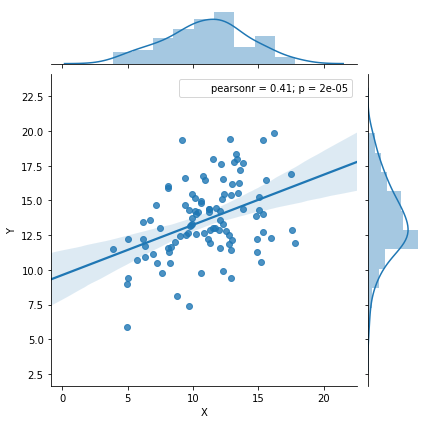

Генерируется выборка из нормального распределения с mu = 9.1, 8.9; sigma = 3.7
вариант 8     ----------------------------------------
           X       Y
Средние: 8.91    8.57
ст.откл: 4.03    3.88
95-процентный доверительный интервал X: ( 8.24, 9.58 )
95-процентный доверительный интервал Y: ( 7.93, 9.21 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 0.61; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.28 значим (p-value = 0.00480553).


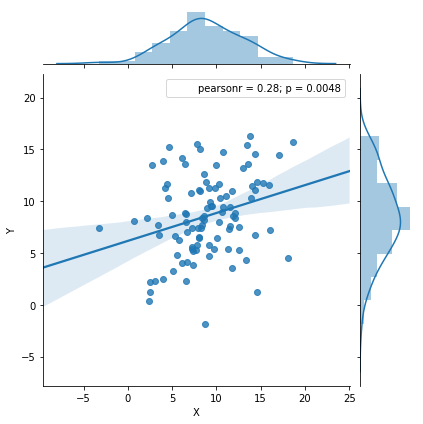

Генерируется выборка из нормального распределения с mu = 10.0, 9.9; sigma = 5.2
вариант 9     ----------------------------------------
           X       Y
Средние: 10.45    9.88
ст.откл: 5.28    4.93
95-процентный доверительный интервал X: ( 9.57, 11.32 )
95-процентный доверительный интервал Y: ( 9.06, 10.70 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 0.78; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.24 значим (p-value = 0.0154775).


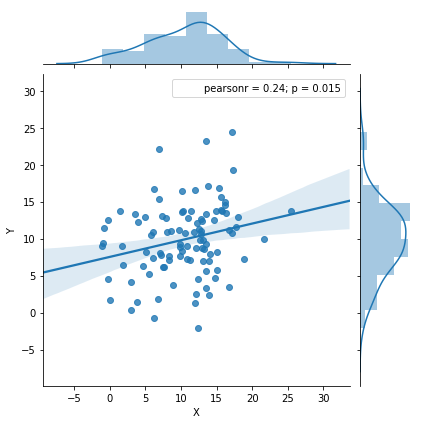

Генерируется выборка из нормального распределения с mu = 13.2, 12.4; sigma = 5.3
вариант 10     ----------------------------------------
           X       Y
Средние: 13.53    12.25
ст.откл: 5.44    4.78
95-процентный доверительный интервал X: ( 12.62, 14.43 )
95-процентный доверительный интервал Y: ( 11.46, 13.05 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.14; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 1.76; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.41 значим (p-value = 2.02334e-05).


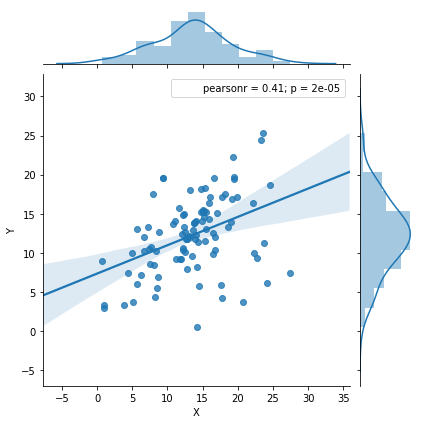

Генерируется выборка из нормального распределения с mu = 11.3, 7.0; sigma = 4.3
вариант 11     ----------------------------------------
           X       Y
Средние: 11.84    7.23
ст.откл: 4.47    4.18
95-процентный доверительный интервал X: ( 11.10, 12.58 )
95-процентный доверительный интервал Y: ( 6.53, 7.92 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 7.53; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.21 значим (p-value = 0.0332366).


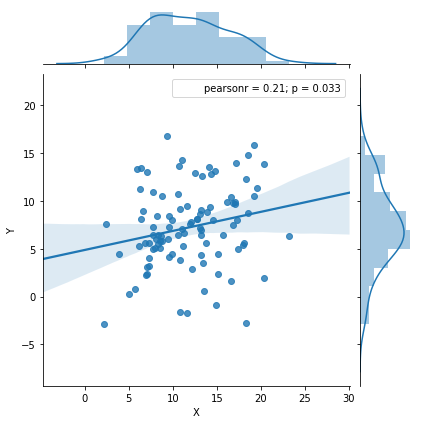

Генерируется выборка из нормального распределения с mu = 12.0, 6.1; sigma = 5.1
вариант 12     ----------------------------------------
           X       Y
Средние: 12.24    6.10
ст.откл: 5.27    5.51
95-процентный доверительный интервал X: ( 11.37, 13.12 )
95-процентный доверительный интервал Y: ( 5.18, 7.02 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.05; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 8.05; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.17 не значим (p-value = 0.0958944).


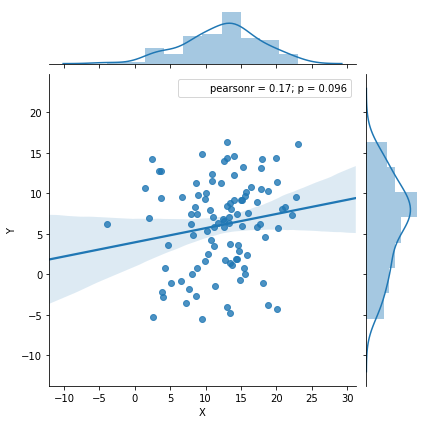

Генерируется выборка из нормального распределения с mu = 6.9, 11.7; sigma = 2.3
вариант 13     ----------------------------------------
           X       Y
Средние: 7.15    11.69
ст.откл: 2.46    2.44
95-процентный доверительный интервал X: ( 6.74, 7.56 )
95-процентный доверительный интервал Y: ( 11.29, 12.10 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -13.11; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.20 значим (p-value = 0.0496842).


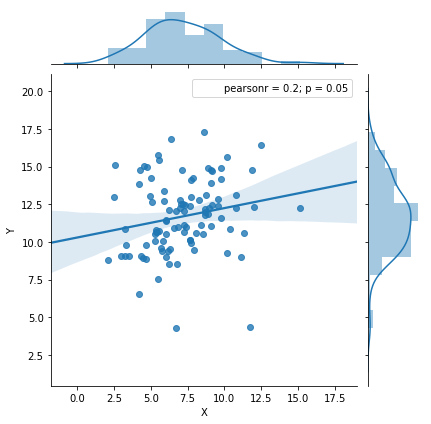

Генерируется выборка из нормального распределения с mu = 10.0, 9.1; sigma = 1.0
вариант 14     ----------------------------------------
           X       Y
Средние: 9.94    9.11
ст.откл: 1.00    1.10
95-процентный доверительный интервал X: ( 9.77, 10.10 )
95-процентный доверительный интервал Y: ( 8.93, 9.29 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.10; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 5.57; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.06 не значим (p-value = 0.563616).


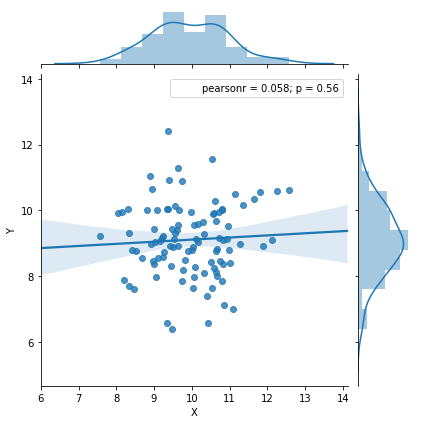

Генерируется выборка из нормального распределения с mu = 11.0, 11.9; sigma = 4.2
вариант 15     ----------------------------------------
           X       Y
Средние: 10.85    11.23
ст.откл: 4.20    4.32
95-процентный доверительный интервал X: ( 10.15, 11.55 )
95-процентный доверительный интервал Y: ( 10.51, 11.94 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.62; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.30 значим (p-value = 0.00286493).


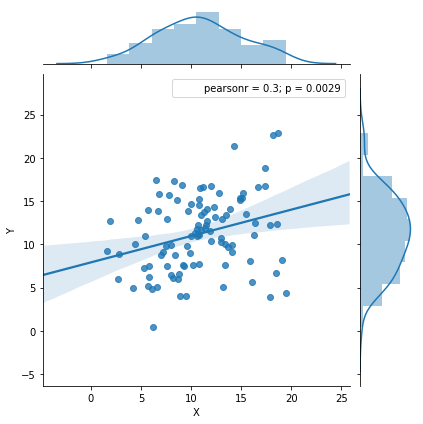

Генерируется выборка из нормального распределения с mu = 9.7, 11.4; sigma = 4.5
вариант 16     ----------------------------------------
           X       Y
Средние: 9.89    11.10
ст.откл: 3.86    3.99
95-процентный доверительный интервал X: ( 9.25, 10.53 )
95-процентный доверительный интервал Y: ( 10.44, 11.76 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -2.18; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.03 не значим (p-value = 0.788542).


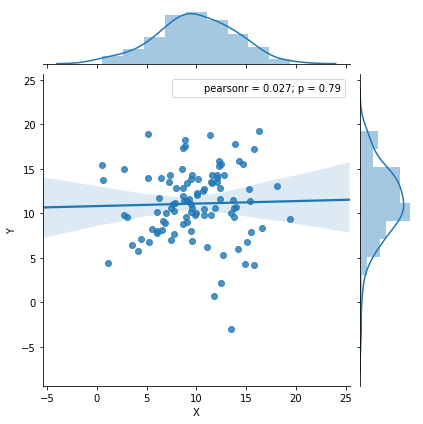

Генерируется выборка из нормального распределения с mu = 13.1, 11.2; sigma = 5.4
вариант 17     ----------------------------------------
           X       Y
Средние: 13.37    10.17
ст.откл: 5.48    5.56
95-процентный доверительный интервал X: ( 12.46, 14.28 )
95-процентный доверительный интервал Y: ( 9.25, 11.10 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.02; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.10; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.33 значим (p-value = 0.000818876).


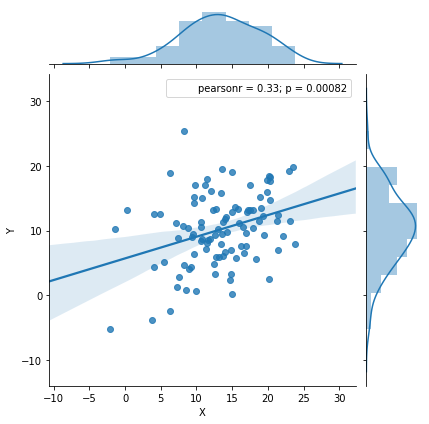

Генерируется выборка из нормального распределения с mu = 13.7, 10.6; sigma = 4.3
вариант 18     ----------------------------------------
           X       Y
Средние: 12.92    10.76
ст.откл: 4.20    4.76
95-процентный доверительный интервал X: ( 12.22, 13.62 )
95-процентный доверительный интервал Y: ( 9.97, 11.55 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.14; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 3.40; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.08 не значим (p-value = 0.409473).


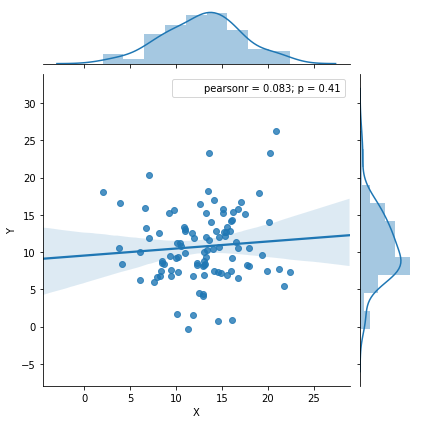

Генерируется выборка из нормального распределения с mu = 9.9, 6.3; sigma = 3.5
вариант 19     ----------------------------------------
           X       Y
Средние: 10.45    6.15
ст.откл: 3.64    3.81
95-процентный доверительный интервал X: ( 9.85, 11.06 )
95-процентный доверительный интервал Y: ( 5.52, 6.78 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.05; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 8.16; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.18 не значим (p-value = 0.0725202).


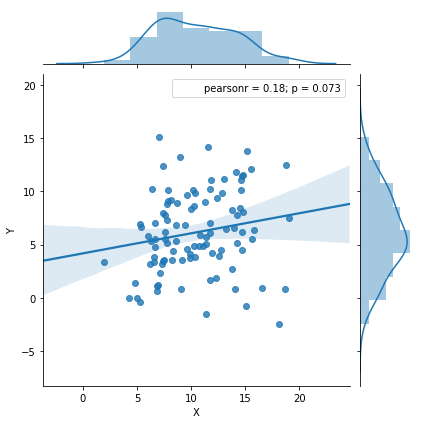

Генерируется выборка из нормального распределения с mu = 7.1, 9.4; sigma = 4.0
вариант 20     ----------------------------------------
           X       Y
Средние: 6.85    9.75
ст.откл: 3.99    3.84
95-процентный доверительный интервал X: ( 6.18, 7.51 )
95-процентный доверительный интервал Y: ( 9.11, 10.38 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.23; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.16 не значим (p-value = 0.105166).


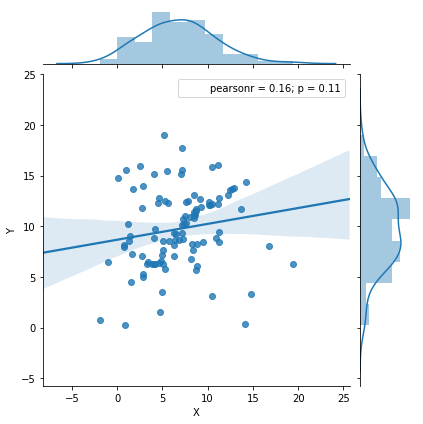

Генерируется выборка из нормального распределения с mu = 7.7, 6.2; sigma = 3.9
вариант 21     ----------------------------------------
           X       Y
Средние: 8.92    6.50
ст.откл: 3.74    4.34
95-процентный доверительный интервал X: ( 8.30, 9.54 )
95-процентный доверительный интервал Y: ( 5.78, 7.22 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.16; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.23; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.27 значим (p-value = 0.00615621).


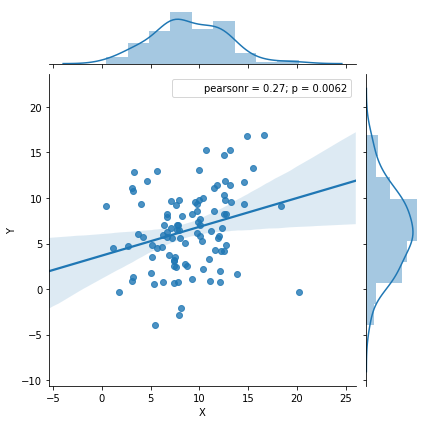

Генерируется выборка из нормального распределения с mu = 9.4, 14.3; sigma = 2.2
вариант 22     ----------------------------------------
           X       Y
Средние: 9.04    14.22
ст.откл: 2.16    2.01
95-процентный доверительный интервал X: ( 8.69, 9.40 )
95-процентный доверительный интервал Y: ( 13.89, 14.55 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -17.57; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.06 не значим (p-value = 0.544816).


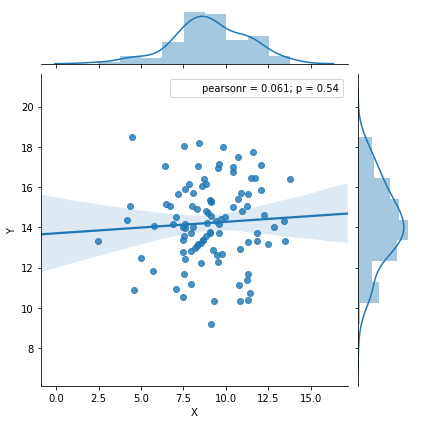

Генерируется выборка из нормального распределения с mu = 6.3, 6.6; sigma = 4.3
вариант 23     ----------------------------------------
           X       Y
Средние: 6.53    5.65
ст.откл: 4.06    4.08
95-процентный доверительный интервал X: ( 5.86, 7.21 )
95-процентный доверительный интервал Y: ( 4.98, 6.33 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.00; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 1.52; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.21 значим (p-value = 0.0319997).


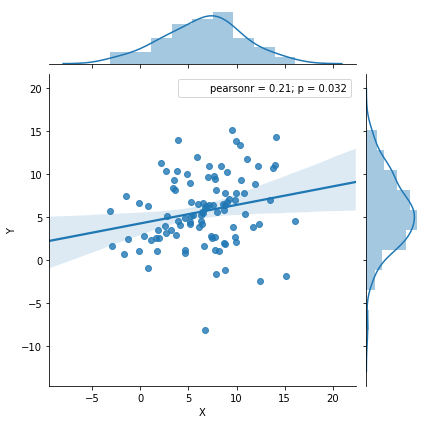

Генерируется выборка из нормального распределения с mu = 13.1, 14.1; sigma = 2.4
вариант 24     ----------------------------------------
           X       Y
Средние: 13.59    13.75
ст.откл: 2.55    2.34
95-процентный доверительный интервал X: ( 13.17, 14.01 )
95-процентный доверительный интервал Y: ( 13.36, 14.14 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.47; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.22 значим (p-value = 0.0276328).


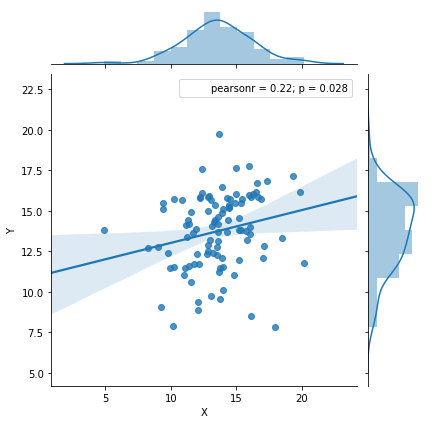

Генерируется выборка из нормального распределения с mu = 7.1, 7.3; sigma = 5.3
вариант 25     ----------------------------------------
           X       Y
Средние: 6.87    7.16
ст.откл: 5.58    5.68
95-процентный доверительный интервал X: ( 5.94, 7.80 )
95-процентный доверительный интервал Y: ( 6.21, 8.10 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.02; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.36; tk = ±1.97 )
Коэффициент корреляции Пирсона r = -0.04 не значим (p-value = 0.728002).


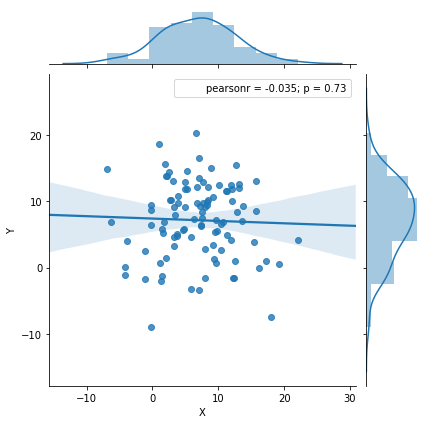

Генерируется выборка из нормального распределения с mu = 14.1, 12.3; sigma = 1.5
вариант 26     ----------------------------------------
           X       Y
Средние: 14.01    12.36
ст.откл: 1.49    1.48
95-процентный доверительный интервал X: ( 13.76, 14.25 )
95-процентный доверительный интервал Y: ( 12.11, 12.60 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 7.86; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.30 значим (p-value = 0.00280177).


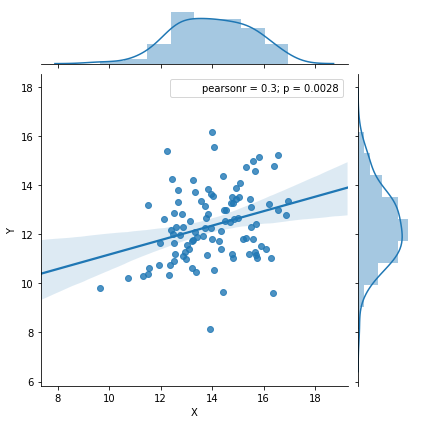

Генерируется выборка из нормального распределения с mu = 7.9, 10.7; sigma = 2.6
вариант 27     ----------------------------------------
           X       Y
Средние: 8.03    10.65
ст.откл: 2.69    2.72
95-процентный доверительный интервал X: ( 7.58, 8.48 )
95-процентный доверительный интервал Y: ( 10.20, 11.10 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.84; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.15 не значим (p-value = 0.13326).


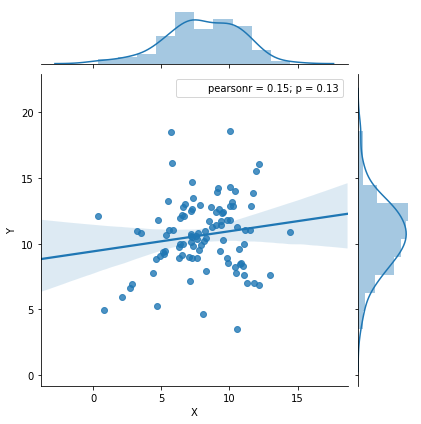

Генерируется выборка из нормального распределения с mu = 10.3, 14.6; sigma = 1.6
вариант 28     ----------------------------------------
           X       Y
Средние: 10.32    14.65
ст.откл: 1.53    1.51
95-процентный доверительный интервал X: ( 10.06, 10.57 )
95-процентный доверительный интервал Y: ( 14.40, 14.90 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -20.13; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.28 значим (p-value = 0.004937).


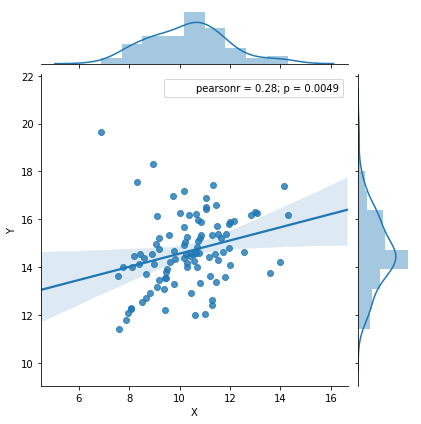

Генерируется выборка из нормального распределения с mu = 14.8, 15.7; sigma = 5.9
вариант 29     ----------------------------------------
           X       Y
Средние: 15.90    16.36
ст.откл: 6.14    5.74
95-процентный доверительный интервал X: ( 14.88, 16.92 )
95-процентный доверительный интервал Y: ( 15.41, 17.32 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.55; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.21 значим (p-value = 0.0363519).


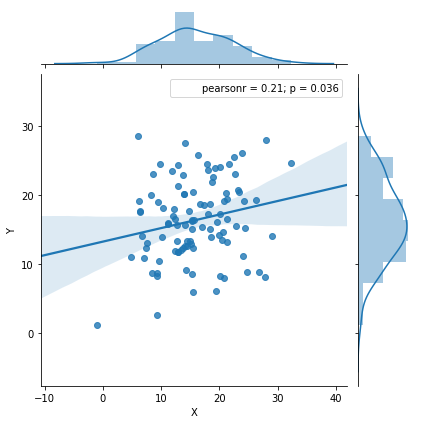

In [8]:
# генерируются данные


def partial_sort(X, p=0.5, comp = lambda x,y: x < y):
    """ p - вероятность для двух сосебних элементов быть отсортироваными
    """
    for i in range(len(X)):
        if random()<p:
            for j in range(len(X)-i-1):
                if comp(X[j], X[j+1]): 
                    X[j], X[j+1] = X[j+1], X[j]
    return X



def gen_data_func(N, func = lambda x: x, noise_k = 1):
    """ Создание двух СВ связаных зависимостью func
    """
    mu1 = round(6+random()*10,1)
    mu2 = round(6+random()*10,1)
    sigma = round(1+random()*5,1)
    print("Генерируется выборка из нормального распределения с mu = %2.1f, %2.1f; sigma = %2.1f" % 
          (mu1, mu2, sigma))
    X = [round(gauss(mu1, sigma),2) for i in range(100)]
    ynoise = int(sigma)*3
    Y = [func( x ) + randint(-ynoise, ynoise)*noise_k for x in X]
    return pd.DataFrame({'X': X, 'Y':Y})


def gen_data(N, p = 0, compy = lambda x,y: x < y):
    """ Создание двух СВ -> DataFrame(X,Y)
    p - вероятность сортировки элементов в списках
    (если элементы отсортированы, то получается лин. зависимость)
    comp - как сравнивать элементы Y при сортировке
    """
    mu1 = round(6+random()*10,1)
    mu2 = round(6+random()*10,1)
    sigma = round(1+random()*5,1)
    print("Генерируется выборка из нормального распределения с mu = %2.1f, %2.1f; sigma = %2.1f" % 
          (mu1, mu2, sigma))
    X = [round(gauss(mu1, sigma),2) for i in range(100)]
    Y = [round(gauss(mu2, sigma),2) for i in range(100)]
    data = pd.DataFrame({'X': X, 'Y':Y})
    partial_sort(data['X'], p)
    partial_sort(data['Y'], p, compy)
    return data


def print_data(d):
    X = d.X
    Y = d.Y
#     suptitle("X", size=16)
#     sb.distplot(X)
#     show()
#     suptitle("Y", size=16)
#     sb.distplot(Y)
#     show()
    describe2( d['X'], d['Y'], alpha=0.05, show = True)
    sb.jointplot(x='X', y='Y', data = d, kind='reg')
    show()
    

import os

if not os.path.isdir("task1"):
    os.mkdir("task1")
    
os.chdir('task1')
for i in range(1,30):
    data = gen_data(100, p = 0.2)
    print("вариант {}     ".format(i)+"--"*20)
    print_data(data)
    data.to_csv('V%0.2i.csv' % (i))
os.chdir('..')